In [4]:
import pandas as pd
import numpy as np
import random as rnd


In [19]:
gender=pd.read_csv('C:/users/dinom/downloads/titanic/gender_submission.csv')
train=pd.read_csv('C:/users/dinom/downloads/titanic/train.csv')
test=pd.read_csv('C:/users/dinom/downloads/titanic/test.csv')
combine=[train, test]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
test.isnull().sum()
test.info()
test.isnull().sum()
train.describe()
train.describe(include=["O"])
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
print('train data shape:', train.shape)
print('test data shape:',test.shape)
print('--------[train information]--------')
print(train.info())
print('--------[test information]--------')
print(test.info())

train data shape: (891, 12)
test data shape: (418, 11)
--------[train information]--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
--------[test information]--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Col

In [33]:
train[['Pclass','Survived','Age']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived', ascending=False)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [34]:
train.pivot_table('Survived',index='Sex',columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


C:\ProgramData\Anaconda3-1\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


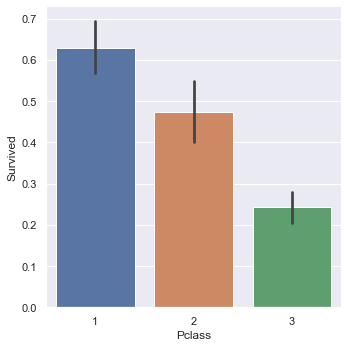

In [35]:
grid=sns.FacetGrid(train, size=5)
grid.map(sns.barplot, 'Pclass', 'Survived', palette='deep',order=[1,2,3])

In [36]:
train[['Sex','Survived']].groupby('Sex',as_index=False).mean().sort_values(by='Sex',ascending=False)

,Sex,Survived
1,male,0.188908
0,female,0.742038


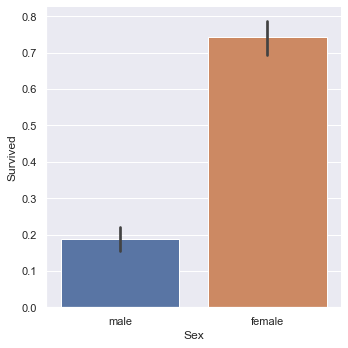

In [38]:
grid=sns.FacetGrid(train, size=5)
grid.map(sns.barplot, 'Sex','Survived',order=['male','female'],palette='deep');

C:\ProgramData\Anaconda3-1\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


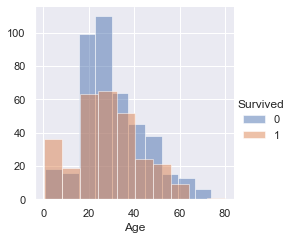

In [39]:
grid=sns.FacetGrid(train, hue='Survived',size=3.5)
grid.map(plt.hist, 'Age', alpha=.5)
grid.add_legend();

C:\ProgramData\Anaconda3-1\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


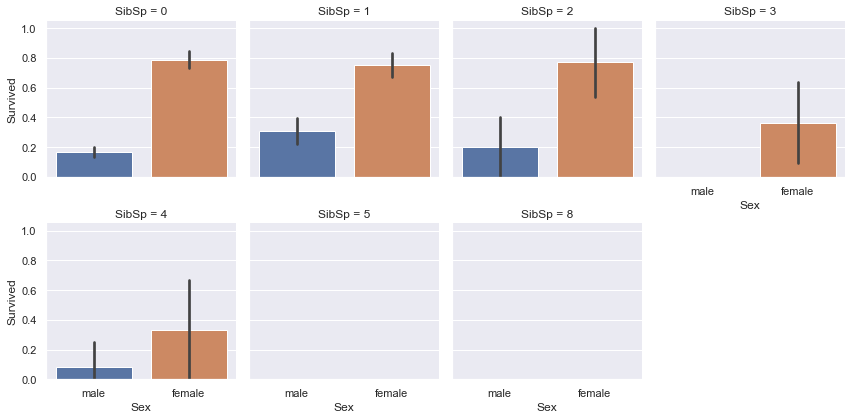

In [40]:
grid=sns.FacetGrid(train, col='SibSp', col_wrap=4, size=3)
grid.map(sns.barplot, 'Sex','Survived', order=['male','female'],palette='deep')

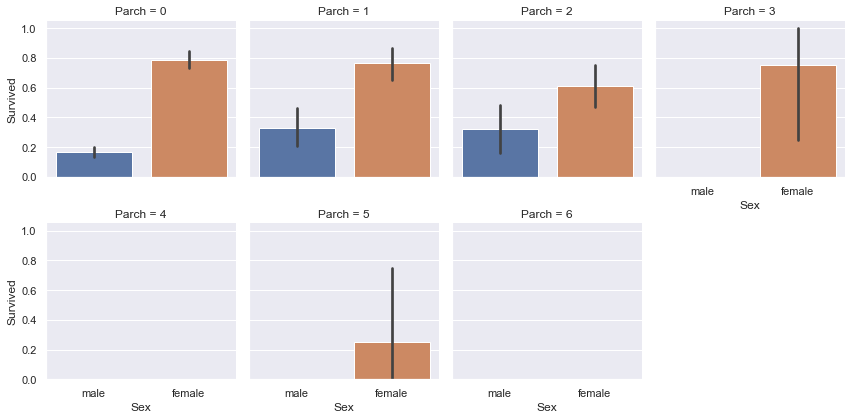

In [42]:
grid = sns.FacetGrid(train, col='Parch', col_wrap=4, size = 3)
grid.map(sns.barplot, 'Sex', 'Survived', order=['male','female'], palette='deep');

C:\ProgramData\Anaconda3-1\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


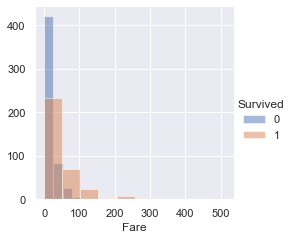

In [45]:
grid = sns.FacetGrid(train, hue='Survived', size=3.5)
grid.map(plt.hist, 'Fare', alpha=.5)
grid.add_legend();

In [22]:
def pie_chart(feature):
    feature_ratio=train[feature].value_counts(sort=False)
    feature_size=feature_ratio.size
    feature_index=feature_ratio.index
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    
    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature+'\'s ratio in total')
    plt.show()
    
    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size+1, i + 1, aspect='equal')
        plt.pie([survived[index], dead[index]],labels=['Survived','Dead'],autopct='%1.1f%%')
        plt.title(str(index)+'\'s ratio')
        
    plt.show()

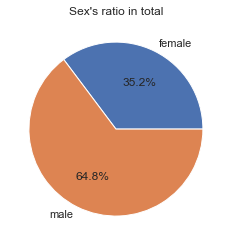

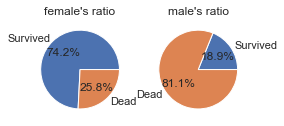

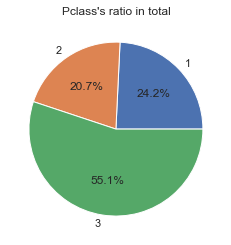

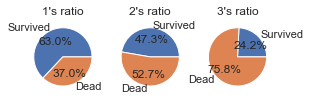

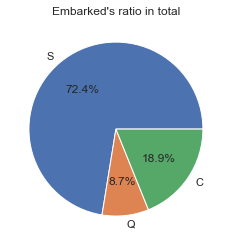

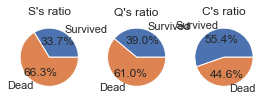

In [25]:
pie_chart('Sex')
pie_chart('Pclass')
pie_chart('Embarked')

In [30]:
def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

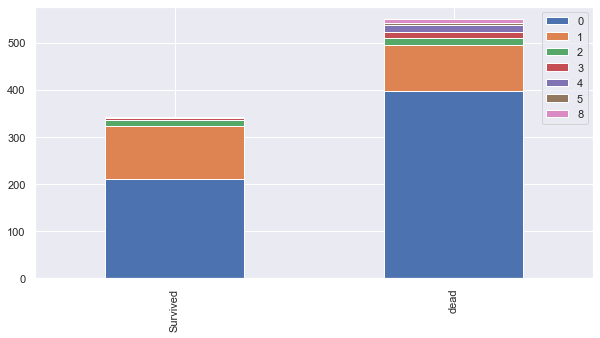

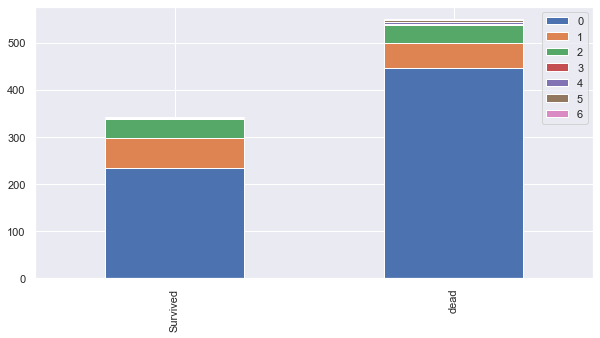

In [31]:
bar_chart("SibSp")
bar_chart("Parch")

In [33]:
train_and_test=[train,test]

In [35]:
for dataset in train_and_test:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.')
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [18]:
pd.crosstab(train.df['Title'], train.df['Sex'])

KeyError: 'Title'